# [Dacon_보스턴 집값 예측 경진대회](https://dacon.io/competitions/open/236065/overview/description)

- 평가 산식 : RMSE
- 컬럼 종류
    - CRIM: 도시별 1인당 범죄율
    - ZN: 25,000 피트를 초과하는 주거용 토지의 비율
    - NDUS: 비상업 면적의 비율
    - CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
    - NOX: 일산화질소 농도
    - RM: 주택당 평균 방의 개수
    - AGE: 1940년 이전에 건축된 자가주택의 비율
    - DIS: 5개의 보스턴 고용 센터와의 거리
    - RAD: 고속도로 접근성 지수
    - TAX: 10,000달러당 재산세율
    - PTRATIO: 도시별 교사와 학생 수 비율
    - B: 마을의 흑인 거주 비율
    - LSTAT: 하위 계층의 비율
    - MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러)

[가설]
- CRIM(도시별 1인당 범죄율)과 MEDV(본인 소유의 주택 가격) 간에는 **음**의 상관성이 존재할 것이다.
- ZN(25,000 피트를 초과하는 주거용 토지의 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- INDUS(비상업 면적의 비율): ???
- CHAS(찰스강 경계에 위치한 경우는 1, 아니면 0)이 1이면 0일때 보다 MEDV 값이 높을 것이다.
- NOX(일산화질소 농도)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.
- RM(주택당 평균 방 개수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- AGE(1940년 이전에 건축된 자가주택의 비율)과 MEDV(본인 소유의 주택 가격) 간에는 **음**의 상관성이 존재할 것이다.
- DIS(5개의 보스턴 고용 센터와의 거리)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.
- RAD(고속도로 접근성 지수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- TAX(10,000달러당 재산세율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
    - [제산세](https://easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=1259&ccfNo=4&cciNo=1&cnpClsNo=3): 토지, 건축물, 주택, 항공기 및 선박과 같은 재산에 대해 정기적으로 부과되는 지방세
- PTRATIO(도시별 교사와 학생 수 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- B(마을의 흑인 거주 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.
- LSTAT(하위 계층의 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.

## 1. 데이터 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

train = pd.read_csv('C:/Users/user/Desktop/Python/adp/2. dacon/data/house_price/train.csv').drop('ID', axis=1)
display(train.head(3))
print(train.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


(455, 14)


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    float64
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    float64
 9   TAX      455 non-null    float64
 10  PTRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  MEDV     455 non-null    float64
dtypes: float64(14)
memory usage: 49.9 KB


In [3]:
# 결측치 확인
train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
# 중복 개수 확인
print('중복 행 개수: {} 개'.format(train.duplicated().sum()))

중복 행 개수: 0 개


In [5]:
# 기초통계량 확인
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## 2. EDA

#### 1) MEDV 분포 확인

In [2]:
# 통계 분석을 위한 dataframe 생성
train_stats = train.copy()

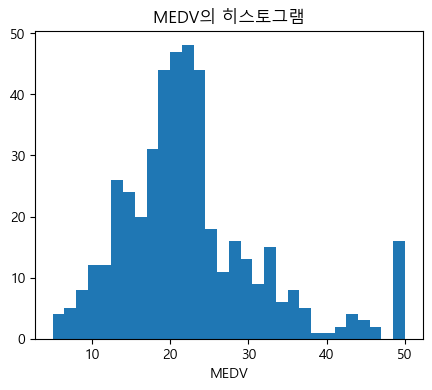

In [7]:
plt.figure(figsize=(5,4))
plt.hist(data=train_stats, x='MEDV', bins=30)
plt.xlabel('MEDV')
plt.title('MEDV의 히스토그램')
plt.show()

#### 1) - (1) MEDV(종속변수)의 정규성 검정

In [8]:
# 귀무가설: 정규성을 만족함.
# 대립가설: 정규성을 만족하지 않음
import scipy.stats as stats
print(stats.shapiro(train_stats['MEDV']))

if stats.shapiro(train_stats['MEDV'])[1] < 0.05:
    print('=> p-value < 0.05 이므로 정규성을 만족하지 않음')
else: print('=> p-value >= 0.05 이므로 정규성을 만족함')

ShapiroResult(statistic=0.9195359945297241, pvalue=7.256905647690277e-15)
=> p-value < 0.05 이므로 정규성을 만족하지 않음


#### 2) 변수간 상관관계 히트맵

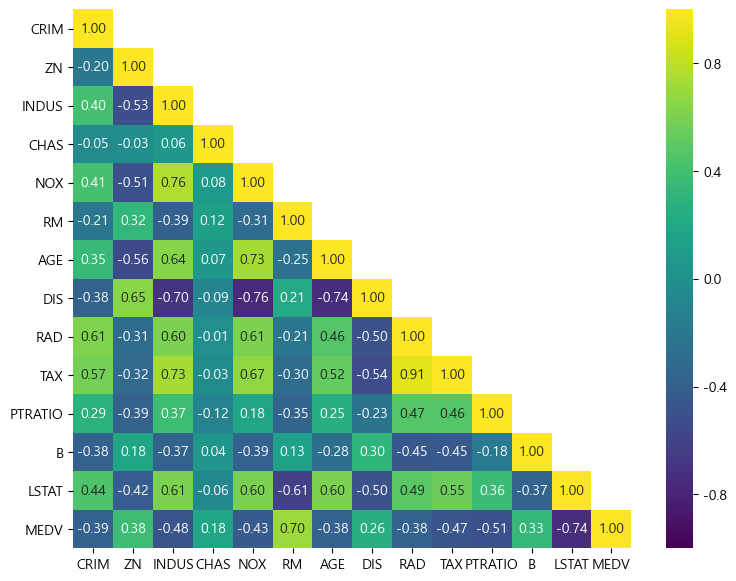

In [9]:
train_corr = train_stats.corr()
up_mask = np.triu(np.ones(train_corr.shape), k=1).astype(np.bool_)

plt.figure(figsize=(8,6))
sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='viridis', mask=up_mask)
plt.show()

[가설 검토]
- CRIM(도시별 1인당 범죄율)과 MEDV(본인 소유의 주택 가격) 간에는 **음**의 상관성이 존재할 것이다.
- ZN(25,000 피트를 초과하는 주거용 토지의 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- INDUS(비상업 면적의 비율): ???
- CHAS(찰스강 경계에 위치한 경우는 1, 아니면 0)이 1이면 0일때 보다 MEDV 값이 높을 것이다.
- NOX(일산화질소 농도)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.
- RM(주택당 평균 방 개수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- AGE(1940년 이전에 건축된 자가주택의 비율)과 MEDV(본인 소유의 주택 가격) 간에는 **음**의 상관성이 존재할 것이다.
- DIS(5개의 보스턴 고용 센터와의 거리)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.
- RAD(고속도로 접근성 지수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → **음**의 상관성
- TAX(10,000달러당 재산세율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → **음**의 상관성
    - [제산세](https://easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=1259&ccfNo=4&cciNo=1&cnpClsNo=3): 토지, 건축물, 주택, 항공기 및 선박과 같은 재산에 대해 정기적으로 부과되는 지방세
- PTRATIO(도시별 교사와 학생 수 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다.  → **음**의 상관성
- B(마을의 흑인 거주 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다. → **양**의 상관성
- LSTAT(하위 계층의 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다.

[상관관계 히트맵 해석]
- TAX와 RAD 변수 간에 0.91라는 강한 상관성이 존재하므로 다중공선정을 의심할 수 있음.
- 종속변수인 MEDV와 강한 상관성을 갖는 변수는 LSTAT이고 이때 상관계수는 -0.74임.

In [10]:
# 상관계수 값이 큰 상위 faeture 출력

## 상관계수에 절댓값 적용
corr_unstack = train_corr.abs().unstack()
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), columns=['corr'])[:10]
display(df_cor.style.background_gradient(cmap='viridis'))

## 상위 피처 컬럼명
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
TAX,RAD,0.908535
RAD,TAX,0.908535
NOX,DIS,0.762721
DIS,NOX,0.762721
NOX,INDUS,0.759181
INDUS,NOX,0.759181
DIS,AGE,0.741336
AGE,DIS,0.741336
LSTAT,MEDV,0.738124
MEDV,LSTAT,0.738124


top_corr_cols: ['TAX' 'RAD' 'NOX' 'DIS' 'INDUS' 'AGE' 'LSTAT' 'MEDV']


#### 3) 통계분석 - (1) 회귀분석 가정

- 선형성, 정규성, 등분산성, 독립성

**참고 사이트**  
[[회귀분석] 회귀분석 실습(2) - 잔차분석(Python)](https://ysyblog.tistory.com/120)

In [11]:
## CHAS을 범주형으로 바꾸기
train_linear = train.copy() # 선형회귀분석을 위한 데이터프레임 만들기
train_linear.loc[train['CHAS'] == 1, 'CHAS'] = 'yes'
train_linear.loc[train['CHAS'] == 0, 'CHAS'] = 'no'

## CHAS을 더비변수로 만들기
train_linear = pd.get_dummies(train_linear, columns=['CHAS'], drop_first=True)
train_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      455 non-null    float64
 1   ZN        455 non-null    float64
 2   INDUS     455 non-null    float64
 3   NOX       455 non-null    float64
 4   RM        455 non-null    float64
 5   AGE       455 non-null    float64
 6   DIS       455 non-null    float64
 7   RAD       455 non-null    float64
 8   TAX       455 non-null    float64
 9   PTRATIO   455 non-null    float64
 10  B         455 non-null    float64
 11  LSTAT     455 non-null    float64
 12  MEDV      455 non-null    float64
 13  CHAS_yes  455 non-null    uint8  
dtypes: float64(13), uint8(1)
memory usage: 46.8 KB


In [12]:
# 모델 생성
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS_yes', 
               data=train_linear)
result = model.fit()

# 잔차 계산
predicted = result.predict(train_linear.drop(columns=['MEDV'], axis=1))
residual = train_linear['MEDV'] - predicted

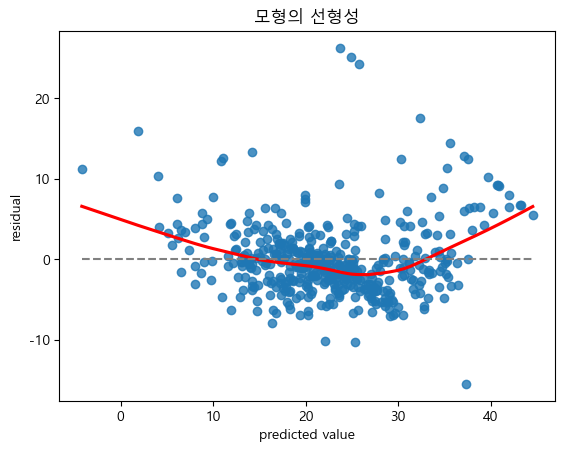

In [13]:
# 선형성
sns.regplot(predicted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([predicted.min(), predicted.max()], [0,0], '--', color='grey')
plt.title('모형의 선형성')
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.show()

[해석]
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야함.
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선에서 크게 벗어나므로 예측값에 따라 잔차가 달라진다는 것이기에 선형성이 없다고 판단함.

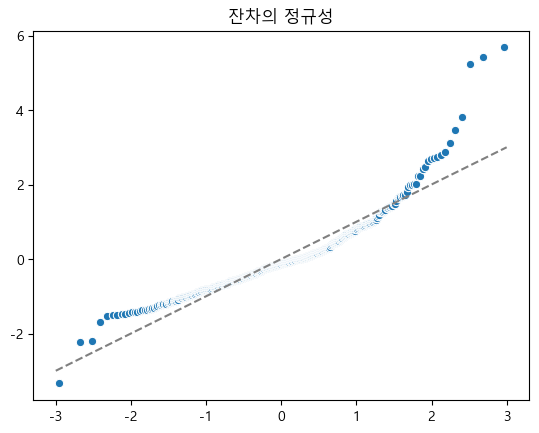

ShapiroResult(statistic=0.8916897773742676, pvalue=2.1742377880868553e-17)
=> p-value < 0.05 이므로 정규성을 만족하지 않음


In [14]:
# 정규성
import scipy.stats as stats

## Q-Q plot
sr = stats.zscore(residual)
(x, y), _ = stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title('잔차의 정규성')
plt.show()

## shapiro test
## 귀무가설: 정규성을 만족함.
## 대립가설: 정규성을 만족하지 않음.
print(stats.shapiro(residual))
if stats.shapiro(residual)[1] < 0.05:
    print('=> p-value < 0.05 이므로 정규성을 만족하지 않음')
else: print('=> p-value >= 0.05 이므로 정규성을 만족함')

[해석]
- 점들이 점선에 따라 배치되어있지 않으므로 정규성을 만족하지 않음.
- shapiro test를 통해 알 수 있는데, 역시 정규성을 만족하지 않는다고 판단함.

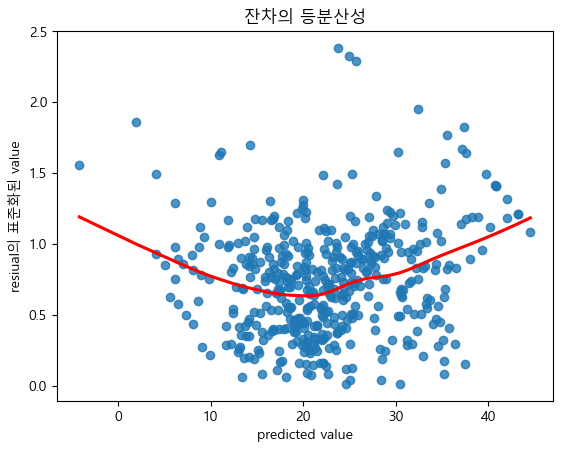

In [15]:
# 등분산성
sns.regplot(predicted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title('잔차의 등분산성')
plt.xlabel('predicted value')
plt.ylabel('resiual의 표준화된 value')
plt.show()

[해석]
- 예측값에 따라 잔차가 어떻게 변하는지 보여주는 그래프인데, 빨간색 실선이 수평선에 가까울수록 등분산성을 만족함.
- 하지만 이를 어기므로 등분산성을 만족하지 않음.

#### 3) - (2) 다중회귀분석(종속변수: MEDV, 독립변수: 그외)
- 회귀분석의 가정을 모두 만족한다는 가정 하에 진행함.

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS_yes', 
               data=train_linear)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     97.64
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.18e-121
Time:                        21:21:08   Log-Likelihood:                -1342.6
No. Observations:                 455   AIC:                             2713.
Df Residuals:                     441   BIC:                             2771.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6210      5.327      6.874      0.000      26.151      47.091
CRIM          -0.1105      0.033     -3.374      0.001      -0.175      -0.046
ZN             0.0455      0.014      3.194      0.002       0.018       0.074
INDUS          0.0495      0.064      0.770      0.442      -0.077       0.176
NOX          -17.8706      3.931     -4.546      0.000     -25.597     -10.144
RM             3.8354      0.436      8.806      0.000       2.979       4.691
AGE            0.0018      0.014      0.130      0.897      -0.025       0.029
DIS           -1.3702      0.205     -6.683      0.000      -1.773      -0.967
RAD            0.3048      0.068      4.462      0.000       0.171       0.439
TAX           -0.0120      0.004     -3.088      0.002      -0.020      -0.004
PTRATIO       -1.0090      0.138     -7.331      0.000      -1.279      -0.738
B              0.0089      0.003      3.210      0.001       0.003       0.014
LSTAT         -0.5208      0.053     -9.836      0.000      -0.625      -0.417
CHAS_yes       2.4724      0.919      2.690      0.007       0.666       4.279
==============================================================================
Omnibus:                      177.556   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.029
Skew:                           1.636   Prob(JB):                    1.63e-195
Kurtosis:                       9.051   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[다중 선형 회귀 분석 해석]
- 수정된 결정계수는 0.735로 어느정도 설명력이 있다고 할 수 있음.
- 회귀모델 유의성 검정 결과, F-값이 97.64이고, p-value < 0.05이므로 회귀모델은 유의수준 0.05하에서 유의하다고 할 수 있음.
- 회귀계수 유의성 검정 결과, INDUS와 Age 외에 모든 독립변수가 유의하다고 할 수 있음.
- 종속변수에 가장 큰 영향을 주는 변수는 NOX(coef = -17.8706)인 것으로 나타남.
- 더빈-왓슨 계수가 2에 근접하므로(1.968) 잔차의 독립성은 만족한다고 판단함.
- 하지만 Notes의 [2]에 명시된 대로 다중공선성 문제가 있음. 

In [17]:
# 다중공선성 판단을 위한 VIF(분산팽창지수)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X= dmatrices('MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS_yes', 
               data=train_linear,
              return_type='dataframe')

vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable']).sort_values(by = 'vif', ascending=False)

,vif,variable
8,8.858027,TAX
7,7.292333,RAD
3,4.314668,NOX
2,3.962295,INDUS
6,3.746728,DIS
5,3.026899,AGE
11,2.897446,LSTAT
1,2.199627,ZN
4,1.907402,RM
9,1.798662,PTRATIO


[해석]
- 상관관계 히트맵에서 알 수 있듯이 RAD와 TAX의 vif값이 상대적으로 높음.
    - 두 변수 간 상관계수는 0.9 였음.

In [18]:
# 변수선택법
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

# 후진제거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model

# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])

In [19]:
# 단계적 선택법
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  13 models on 1 predictors in
Selected predictors: ['LSTAT', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000278FD761F08>
forward
Processed  1 models on 0 predictors in 0.003992319107055664
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000278FD7685C8>
Processed  12 models on 2 predictors in
Selected predictors: ['LSTAT', 'RM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000278FD75F088>
forward
Processed  2 models on 1 predictors in 0.004984617233276367
Selected predictors: ['LSTAT', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000278F13E78C8>
Processed  11 models on 3 predictors in
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000278FD752708>
forward
Processed  3 m

In [20]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.07e-122
Time:                        21:21:10   Log-Likelihood:                -1342.9
No. Observations:                 455   AIC:                             2710.
Df Residuals:                     443   BIC:                             2759.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.5152      0.050    -10.355      0.000      -0.613      -0.417
RM             3.8178      0.425      8.982      0.000       2.982       4.653
PTRATIO       -0.9959      0.136     -7.311      0.000      -1.264      -0.728
DIS           -1.4099      0.191     -7.377      0.000      -1.786      -1.034
NOX          -16.9577      3.645     -4.653      0.000     -24.120      -9.795
B              0.0088      0.003      3.203      0.001       0.003       0.014
CHAS_yes       2.5523      0.912      2.799      0.005       0.760       4.344
ZN             0.0440      0.014      3.139      0.002       0.016       0.072
CRIM          -0.1113      0.033     -3.407      0.001      -0.176      -0.047
RAD            0.2902      0.066      4.428      0.000       0.161       0.419
TAX           -0.0106      0.003     -3.066      0.002      -0.017      -0.004
Intercept     36.3649      5.298      6.864      0.000      25.953      46.777
==============================================================================
Omnibus:                      178.575   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.450
Skew:                           1.644   Prob(JB):                    3.28e-198
Kurtosis:                       9.096   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[해석]
- 단계선택법으로 회귀분석한 결과, INDUS와 Age가 탈락되었음.
- 수정된 결정계수는 0.735로 변수선택법을 적용하지 않은 회귀분석의 값과 일치함.
- 회귀모형의 유의성 검정 결과, p-value < 0.05이므로 추정된 회귀모델은 유의하다고 할 수 있음.

[가설]
- CRIM(도시별 1인당 범죄율)과 MEDV(본인 소유의 주택 가격) 간에는 **음**의 상관성이 존재할 것이다. → yes
- ZN(25,000 피트를 초과하는 주거용 토지의 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → yes
- CHAS(찰스강 경계에 위치한 경우는 1, 아니면 0)이 1이면 0일때 보다 MEDV 값이 높을 것이다. → yes
- NOX(일산화질소 농도)와 MEDV 간에는 **음**의 상관성이 존재할 것이다. → yes
- RM(주택당 평균 방 개수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → yes
- DIS(5개의 보스턴 고용 센터와의 거리)와 MEDV 간에는 **음**의 상관성이 존재할 것이다. → yes
- RAD(고속도로 접근성 지수)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → yes
- TAX(10,000달러당 재산세율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → no
    - [제산세](https://easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=1259&ccfNo=4&cciNo=1&cnpClsNo=3): 토지, 건축물, 주택, 항공기 및 선박과 같은 재산에 대해 정기적으로 부과되는 지방세
- PTRATIO(도시별 교사와 학생 수 비율)와 MEDV 간에는 **양**의 상관성이 존재할 것이다. → no
- B(마을의 흑인 거주 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다. → no
- LSTAT(하위 계층의 비율)와 MEDV 간에는 **음**의 상관성이 존재할 것이다. → yes

#### 3) - (3) 일원배치 분산분석
- 귀무가설: CHAS(0, 1)에 따라 MEDV의 평균에 차이가 없다.
- 대립가설: CHAS(0, 1)에 따라 MEDV의 평균에 차이가 있다.

In [21]:
import scipy.stats as stats
train_stats['CHAS'].value_counts()

0.0    425
1.0     30
Name: CHAS, dtype: int64

In [22]:
CHAS_0 = train_stats.loc[train_stats['CHAS']==0, 'MEDV']
CHAS_1 = train_stats.loc[train_stats['CHAS']==1, 'MEDV']

In [23]:
# 정규성, 등분산성 검정
print('정규성 검정')
print(stats.shapiro(CHAS_0))
print(stats.shapiro(CHAS_1))

print('\n등분산성 검정')
print(stats.levene(CHAS_0, CHAS_1))

정규성 검정
ShapiroResult(statistic=0.9294405579566956, pvalue=2.834657421985076e-13)
ShapiroResult(statistic=0.8497606515884399, pvalue=0.0006129213143140078)

등분산성 검정
LeveneResult(statistic=4.402675594978763, pvalue=0.03643584046199921)


[해석]
- 정규성과 등분산성 모두 만족하지 않은 것으로 나타남.

In [24]:
# 크루스칼-왈리스 순위합 검정(Kruskal-Wallis rank sum test)
# 정규성을 만족하지 않은 비모수 분산분석 방법
print('<크루스칼-왈리스 순위합 검정>')
print(stats.kruskal(CHAS_0, CHAS_1))

<크루스칼-왈리스 순위합 검정>
KruskalResult(statistic=9.899867014648247, pvalue=0.001652907159926855)


In [25]:
# Welch's ANOVA 
# 등분산성 가정을 충족하지 않을 때 사용
import pingouin as pg
import warnings
warnings.filterwarnings(action='ignore')
print("Weich's ANOVA")
display(pg.welch_anova(dv = 'CHAS', between='MEDV', data=train_stats))

Weich's ANOVA


,Source,ddof1,ddof2,F,p-unc,np2
0,MEDV,216,1496.553916,0.116187,1.0,0.457654


In [26]:
# 정규성과 등분산성을 모두 만족할 때의 일원배치 분산분석
stats.f_oneway(CHAS_0, CHAS_1)

F_onewayResult(statistic=15.472363040194002, pvalue=9.684375493194697e-05)

[해석]
- 정규성과 등분산성을 모두 만족한다는 가정 하에 진행한 결과, CHAS에 따라 평균 MEDV에 차이가 있다고 할 수 있음.

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,6.6718,0.0001,3.3385,10.0052,True


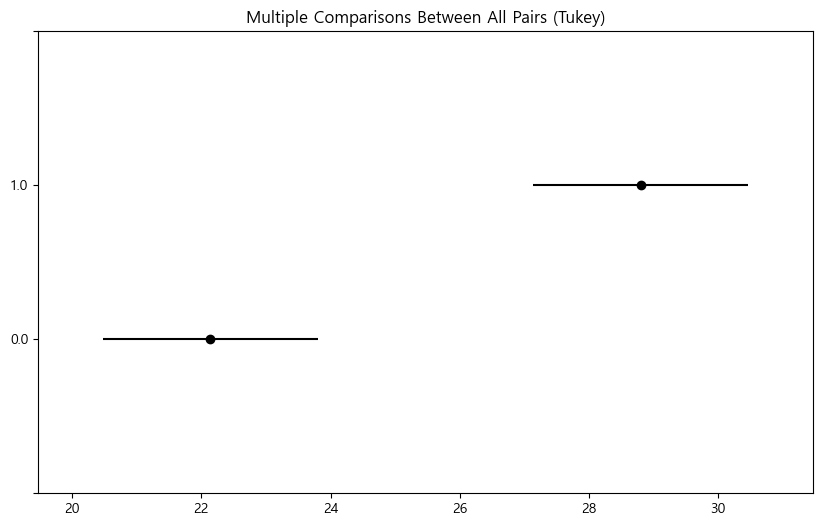

In [27]:
# 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=train_stats['MEDV'], groups=train_stats['CHAS'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
display(tukeyhsd.summary())

#### 3) - (4) 일표본 t-test
- 귀무가설: NOX(일산화질소)의 농도는 0.4이다.
- 대립가설: NOX(일산화질소)의 농도는 0.4가 아니다.

In [28]:
# 정규성 검정
## 귀무가설: 정규분포를 따름.
## 대립가설: 정규분포를 따르지 않음.
stats.shapiro(train_stats['NOX'])

ShapiroResult(statistic=0.9318305850028992, pvalue=1.4948872489265602e-13)

In [29]:
# 정규성을 만족하지 않으므로 윌콕슨 분호 순위 검정 실행
stats.wilcoxon(train_stats['NOX']-0.4)

WilcoxonResult(statistic=66.0, pvalue=1.326655768327734e-75)

[해석]
- 정규성을 만족하지 않아서 윌콕슨 부호 순위 검정을 진행했는데, p-value < 0.05 이므로 귀무가설을 기각하여, NOX의 농도는 0.4가 아님을 알 수 있음.

In [30]:
# 정규성을 만족한다는 가정 하에 t-test
stats.ttest_1samp(train_stats['NOX'], popmean=0.4)

Ttest_1sampResult(statistic=28.403306996235365, pvalue=9.520351304972463e-103)

[해석]
- 일표본 t-test 결과 역시, p-value < 0.05 이므로 귀무가설을 기각하여, NOX의 농도는 0.4가 아님을 알 수 있음.

In [31]:
# 신뢰구간
ci_tuple = stats.t.interval(alpha=0.95, df=len(train_stats['NOX'])-1, 
                            loc=np.mean(train_stats['NOX']), scale=stats.sem(train_stats['NOX']))
print('신뢰구간:', ci_tuple)

신뢰구간: (0.544424394323871, 0.5658951661156896)


[해석]
- 가설을 설정할 때, μ0를 0.4로 설정했고, 이는 위에서 구한 신뢰구간에 포함되지 않으므로 귀무가설을 기각할 수 있음.
- 이는 곧 앞서 진행한 t-test의 결과와 동일함.

#### 3) - (5) 상관분석
[가설]
- 귀무가설: TAX, RAD 간에 상관성이 없다.
- 대립가설: TAX, RAD 간에 상관성이 있다.

In [32]:
value = stats.pearsonr(train_stats['TAX'], train_stats['RAD'])[0]
p = stats.pearsonr(train_stats['TAX'], train_stats['RAD'])[1]

print(f'상관계수: {round(value, 4)} / p-value: {p}')

상관계수: 0.9085 / p-value: 8.272931307680358e-174


[해석]
- p-value < 0.05이므로 귀무가설을 기각하여 두 변수 간에 상관성이 존재함을 알 수 있음.

In [33]:
print('공분산:', np.cov(train_stats['TAX'], train_stats['RAD'])[0, 1])

공분산: 1342.2181294476445


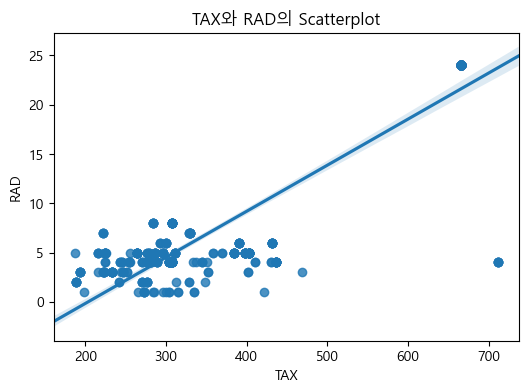

In [34]:
plt.figure(figsize=(6,4))
sns.regplot(train_stats['TAX'], train_stats['RAD'])
plt.title('TAX와 RAD의 Scatterplot')
plt.show()

#### 3) - (6) 교차검증(독립성 검정)
[가설]
- 귀무가설: CRIM, B 간에 연관성이 없다.
- 대립가설: CRIM, B 간에 연관성이 있다.

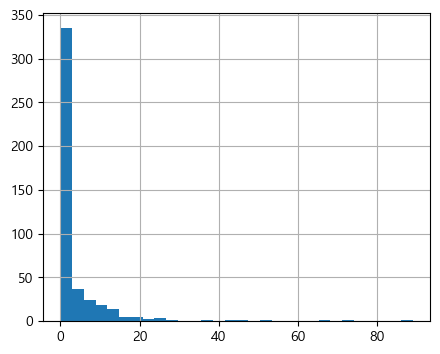

In [35]:
plt.figure(figsize=(5,4))
train_stats['CRIM'].hist(bins=30)
plt.show()

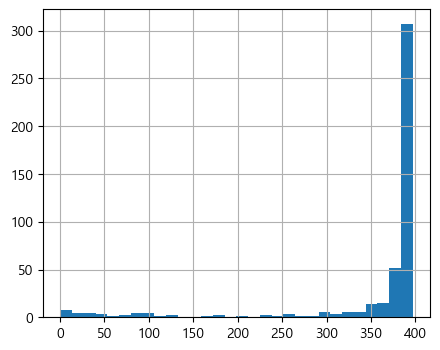

In [36]:
plt.figure(figsize=(5,4))
train_stats['B'].hist(bins=30)
plt.show()

In [37]:
def crim_cate(x):
    if x <= 20: 
        return 0 # 'very low'
    if x > 20 and x <= 40:
        return  1 # 'low'
    if x > 40 and x <= 60:
        return 2 # 'meidan'
    if x > 60 and x <= 80:
        return 3 # 'high'
    if x > 80:
        return 4 # 'very high'
    
train_stats['crim_cate'] = train_stats['CRIM'].apply(crim_cate)

def b_cate(x):
    if x <= 100: 
        return 0 # 'very low'
    if x > 100 and x <= 200:
        return 1 # 'low'
    if x > 200 and x <= 300:
        return 2 # 'meidan'
    if x > 300 and x <= 400:
        return 3 # 'high'
    if x > 400:
        return 4 # 'very high'
    
train_stats['crim_cate'] = train_stats['CRIM'].apply(crim_cate)
train_stats['b_cate'] = train_stats['B'].apply(b_cate)

train_stats.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,crim_cate,b_cate
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,0,3
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3,0,3
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9,0,3


In [38]:
table = pd.crosstab(train_stats['crim_cate'],  train_stats['b_cate'])
table

b_cate,0,1,2,3
crim_cate,,,,
0,25,7,11,395
1,1,1,1,8
2,2,0,0,1
3,1,0,0,1
4,0,0,0,1


In [39]:
from scipy.stats import chi2_contingency
chi, p, dff, expect = chi2_contingency(table)
print('Statistic:', chi)
print('p-value:', p)
print('df:', dff)
print('expect:\n', expect)

Statistic: 30.822435204668317
p-value: 0.002096590450856597
df: 12
expect:
 [[2.79164835e+01 7.70109890e+00 1.15516484e+01 3.90830769e+02]
 [7.01098901e-01 1.93406593e-01 2.90109890e-01 9.81538462e+00]
 [1.91208791e-01 5.27472527e-02 7.91208791e-02 2.67692308e+00]
 [1.27472527e-01 3.51648352e-02 5.27472527e-02 1.78461538e+00]
 [6.37362637e-02 1.75824176e-02 2.63736264e-02 8.92307692e-01]]


[해석]
- p-value < 0.05 이므로 귀무가설을 기각하여 두 변수는 서로 연관성이 있다고 할 수 있음.

상관계수: -0.3841 / p-value: 1.933919233203838e-17


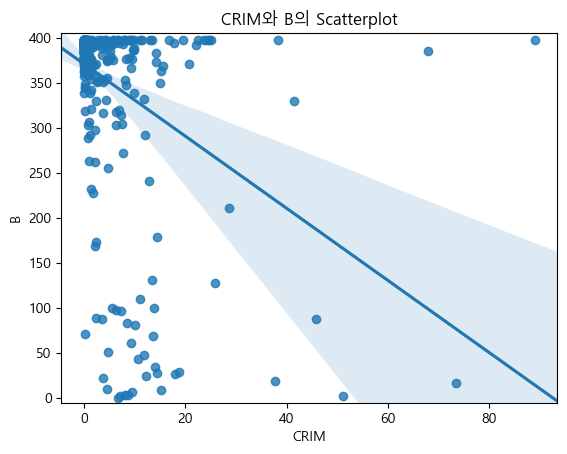

In [40]:
# + 위 두 개 변수들에 대해서 상관분석 진행
value = stats.pearsonr(train_stats['CRIM'], train_stats['B'])[0]
p = stats.pearsonr(train_stats['CRIM'], train_stats['B'])[1]
print(f'상관계수: {round(value, 4)} / p-value: {p}')

sns.regplot(x= train_stats['CRIM'], y=train_stats['B'])
plt.title('CRIM와 B의 Scatterplot')
plt.ylim(-5, 405)
plt.show()

#### 3) - (7) 이원배치 분산분석
[가설]
1. 주효과 검정
    - 귀무가설: CRIM에 따라 MEDV에 차이가 있지 않다.
    - 대립가설: CRIM, B에 따라 MEDV에 차이가 있다.

    - 귀무가설: B에 따라 MEDV에 차이가 있지 않다.
    - 대립가설: B에 따라 MEDV에 차이가 있다.
    
2. 교호작용 검정
    - 귀무가설: CRIM과 B 간에 상호작용 효과가 있다.
    - 대립가설: CRIM과 B 간에 상호작용 효과가 없다.

In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'MEDV ~ C(crim_cate) + C(b_cate) + C(crim_cate):C(b_cate)'
model = ols(formula, train_stats).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(crim_cate),1623.954848,4.0,5.725580,3.508143e-03
C(b_cate),2879.925676,3.0,13.538344,1.822823e-08
C(crim_cate):C(b_cate),1348.651860,12.0,1.584981,1.497346e-01
Residual,31341.282183,442.0,NaN,NaN


[해석]
- CRIM의 주효과 검정 결과, p-value < 0.05 이므로 CRIM에 따라 MEDV에 차이가 있다고 할 수 있음.
- B의 주효과 검정 결과, p-value > 0.05 이므로 B에 따라 MEDV에 차이가 있다고 할 수 있음.
- 상호작용 검정 결과, p-value > 0.05 이므로 두 변수 간에 상호작용이 없는 것으로 판단함.

#### 3) - (8) 주성분 분석
- 서로 상관성이 높은 변수를 선형결합하여 "주성분"이라는 새로운 변수로 만드는 기법 
- 변수가 너무 많아 기존 변수를 조합해 새로운 변수를 가지고 모델링을 하려 할 때 주로 사용 됨(차원 축소).
- PCA를 수행하기 전에 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 방지하기 위해 이상치를 제거하고 스케일링을 수행해야 함.
- 주성분 개수 선정 방법
    - 누적기여율이 약 80% 이상인 지점까지를 주성분의 개수라고 설정할 수 있음.
    - Scree plot을 이용해 기울기가 완만해 지는 지점까지를 주성분의 개수를 설정할 수 있음.

In [42]:
# 주성분 분석할 변수만 추출
train_pca = train_stats.drop(columns=['crim_cate', 'b_cate', 'MEDV'])
train_pca.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
train_pca_sc = scaler.fit_transform(train_pca)
pd.DataFrame(train_pca_sc, columns = train_pca.columns).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406813,3.002116,-1.093709,-0.265684,-1.401764,-0.253876,-1.303530,2.611796,-0.981928,-0.548813,-0.956713,0.395455,-0.852084
1,-0.251735,-0.486989,1.245525,-0.265684,2.713496,0.321580,1.136970,-0.972495,-0.522635,-0.028904,-1.748599,0.086691,-0.736308
2,-0.410238,3.656323,-1.412162,-0.265684,-1.307259,1.216256,-1.953134,1.858385,-0.752282,-0.034812,-0.677224,0.302653,-1.151410
3,0.659319,-0.486989,1.028331,-0.265684,1.356062,0.633643,0.925221,-0.621394,1.659007,1.524914,0.813385,-3.776971,0.861977
4,-0.225651,-0.486989,1.245525,-0.265684,2.713496,-0.233835,1.040068,-1.043610,-0.522635,-0.028904,-1.748599,0.178412,0.211086


In [44]:
pca = PCA(n_components=13)
pca_fit = pca.fit(train_pca_sc)

print('분산 설명력: \n', pca.explained_variance_ratio_) # 전체 데이터에서 각 주성분이 설명할 수 있는 분산의 비율

분산 설명력: 
 [0.4706459  0.10815404 0.09648977 0.06638718 0.06314546 0.05056666
 0.04207723 0.03036023 0.02109831 0.01777714 0.01489526 0.01339605
 0.00500678]


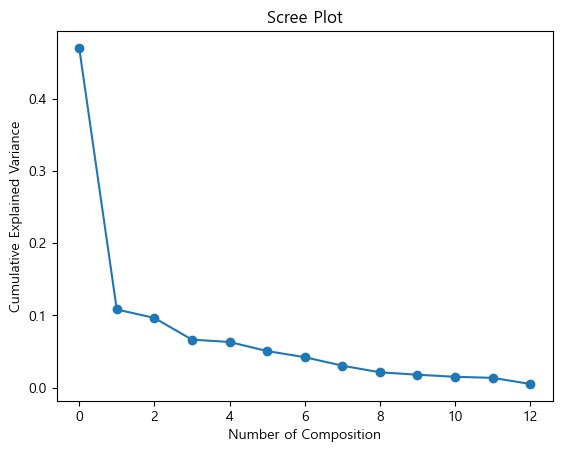

In [45]:
plt.title('Scree Plot')
plt.xlabel('Number of Composition')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [46]:
print('주성분 3개로 축소할 시 분산설명력(=누적기여율): ', pca.explained_variance_ratio_[:3].sum()*100)
print('주성분 5개로 축소할 시 분산설명력(=누적기여율): ', pca.explained_variance_ratio_[:5].sum()*100)

주성분 3개로 축소할 시 분산설명력(=누적기여율):  67.52897062058695
주성분 5개로 축소할 시 분산설명력(=누적기여율):  80.48223417744342


[해석]
- 시각화한 자료로만 보아서는 3개의 차원 축소 값으로 사용하면 되어 보이지만 분산 설명력이 67%임.
- 5개로 축소하면 약 80% 이상이므로 주성분의 개수를 5개로 설정할 수 있다고 판단함.

In [47]:
# PCA 객체 생성 (주성분 개수 5개 선정)
pca = PCA(n_components=5)

# 5개의 주성분을 가진 데이터로 변환
principalComponents = pca.fit_transform(train_pca_sc)
principal_data = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
principal_data.head()

,pc1,pc2,pc3,pc4,pc5
0,-3.960955,-1.859747,0.500043,-0.195254,1.655637
1,1.249413,2.450169,0.526221,-1.908836,-0.169064
2,-4.217295,-1.975493,1.832774,-0.088003,0.772284
3,3.742970,-1.008813,1.989152,-0.873146,-0.195609
4,1.629470,2.274725,-0.049937,-1.953770,0.468236


#### 3) - (9) 이항 로지스틱 회귀분석

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

house_pirce = train_linear['MEDV']
river_yes = train_linear['CHAS_yes']

model = smf.glm("river_yes ~ house_pirce", data = train_linear, family = sm.families.Binomial()).fit()
print(model.summary())

# 오즈비 확인
print('\n<Odds ratio>')
print(model.params)

# exp 취함
print('\n<종속변수에 log를 취한 상태이므로 Odds ratio에 exp를 취함>')
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              river_yes   No. Observations:                  455
Model:                            GLM   Df Residuals:                      453
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.24
Date:                Wed, 14 Jun 2023   Deviance:                       208.47
Time:                        21:21:15   Pearson chi2:                     446.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02743
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.2503      0.515     -8.253      

[해석]
- feature의 p-value값이 0.05보다 작으므로 회귀계수는 통계적으로 유의함.
- feature의 오즈비(coef)를 살펴보면 양수(+)이므로 CHAS_yes에 양의 영향을 준다는 것을 알 수 있다.
- 따라서 집값이 1 증가(천 달러)하면 찰스강 경계에 집이 위치해 있을 확률(1)은 그렇지 않을 때(0)보다 1.065667배 증가함.

#### 4) 이상치 확인

In [49]:
train_melt = pd.melt(train.drop(columns=['CHAS']), var_name='variable', value_name='value')
train_melt

,variable,value
0,CRIM,0.04819
1,CRIM,1.42502
2,CRIM,0.01778
3,CRIM,9.51363
4,CRIM,1.65660
...,...,...
5910,MEDV,24.30000
5911,MEDV,19.90000
5912,MEDV,8.10000
5913,MEDV,20.50000


ERROR! Session/line number was not unique in

 database. History logging moved to new session 3122


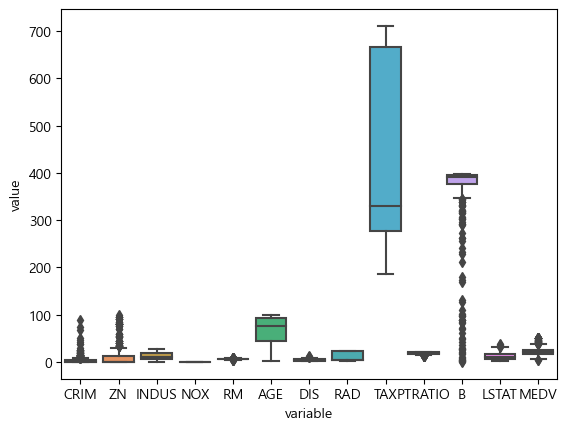

In [50]:
sns.boxplot(data=train_melt, x='variable', y='value')
plt.show()

[해석]
- 상자그림을 통해 이상치가 많은 변수를 확인할 수 있었지만, 이상치들이 연속적으로 이어져 있어 실제로 이상치를 가진 변수가 있을 수 있으므로 현업의 의견이 필요할 것으로 판단함.
- 따라서 이상치를 제거하거나 다른 값으로 대체하는 작업은 하지 않음.

## 3. 모델 구현(머신러닝)
- SVM, RandomForest, XGBoost

    - SVM
        - 분류문제와 달리 회귀문제에서는 마진 내부에 최대한 많은 데이터가 들어가도록 학습하는 알고리즘.
        - 장점: 비선형 회귀에도 쓰일 수 있으며 오류 데이터에 대한 영향이 거의 없으므로 과적합되는 경우가 거의 없음.
        - 단점: 학습 속도가 오래 걸리고, 모델 해석이 어려움.
        
    - RandomForest
        - 배깅, 부스팅보다 더 많은 무작위성을 주어 약한 학습기를 생성한 후, 이를 선형결합하여 최종학습기를 만드는 알고리즘.
        - 장점: 이상치와 결측치에 강하고, 변수의 중요도를 확인할 수 있음. 정규화 과정이 필요 없고, 비선형적인 데이터에도 높은 성능을 보임.
        - 단점: 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모됨.
        
    - XGBoost
        - Gradient Boost 알고리즘을 방렬 학습이 지원되도록 구현한 라이브러리
        - 장점: GBM 대비 수행 시간이 빠름. 조기 종료 기능이 있고, 다양한 옵션을 제공해 customizing 할 수 있음.
        - 단점: 작은 데이터 세트에 대해 과적합 가능성이 있음, 모든 앙상블 계열 알고리즘이 갖고 있는 근원적 문제인 입력 변수에 대하여 출력 변수가 어떻게 변하는지에 대한 해석이 어려움.

 - 공통점
     - 분류와 회귀 문제 모두 쓰일 수 있음.
     - 회귀분석에서 다중공선성 문제를 해결할 수 있음.
     - 모두 범주형 변수를 독립변수로 사용할 수 없어 변환(더미변수)을 해주어야 함.

In [2]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

train = pd.read_csv('C:/Users/user/Desktop/Python/adp/2. dacon/data/house_price/train.csv').drop('ID', axis=1)
display(train.head(3))

X = train.drop(columns=['MEDV'])
y = train.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


(318, 13)
(137, 13)
(318,)
(137,)


### 1. SVR

In [29]:
# 컬럼 속성별 전처리 transformer 만들기
numeric_features = train.columns.drop(['CHAS', 'MEDV'])
categorical_features = ['CHAS']

column_transformer = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)
])

svm_rg = Pipeline([("preprocesser", column_transformer),
                  ('svm', SVR())])

In [30]:
# gridsearch 진행

## 데이터 전처리와 모델 학습하는 파이프라인 만들기
param_grid = {"svm__kernel": ['linear', 'poly', 'rbf'],
            "svm__C": [0.01, 0.1, 1, 10],
             "svm__gamma": [0.01, 0.1, 1, 10]}

## 그리드 서치 진행
start_time = time.time()
grid = GridSearchCV(estimator=svm_rg, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
end_time = time.time()

print(f'소요 시간: {end_time - start_time} sec')

scores_df = pd.DataFrame(grid.cv_results_) # 그리드 서치 결과를 데이터프레임으로 변환
display(scores_df.sort_values(by='mean_test_score', ascending=False).head(5))
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ', grid.best_params_)

## 그리드 서치의 refit으로 이미 학습된 estimator 반환
svr_estimator = grid.best_estimator_

### 그리드 서치의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음.
pred = svr_estimator.predict(X_test)
print('테스트 데이터 RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

소요 시간: 168.00544595718384 sec


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.015817,0.000420,0.006801,0.001158,10,0.1,rbf,"{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel...",-33.532556,-10.482364,-11.752797,-15.936006,-17.676975,-17.876140,8.259424,1
7,0.039712,0.009679,0.011464,0.002918,0.01,1,poly,"{'svm__C': 0.01, 'svm__gamma': 1, 'svm__kernel...",-26.464894,-29.299622,-10.732351,-10.811197,-19.103223,-19.282257,7.704929,2
40,0.022067,0.000600,0.005996,0.000013,10,0.1,poly,"{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel...",-26.464943,-29.299986,-10.732592,-10.811184,-19.103096,-19.282360,7.704983,3
19,0.127725,0.034502,0.006214,0.000751,0.1,1,poly,"{'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel'...",-31.325803,-36.465372,-10.111329,-16.300221,-20.109776,-22.862500,9.694318,4
38,0.014753,0.000401,0.006197,0.000394,10,0.01,rbf,"{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kerne...",-44.393402,-12.330710,-12.685323,-23.982286,-22.778903,-23.234125,11.650267,5


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
테스트 데이터 RMSE: 3.689069490705439


[해석]
- 모델 학습 시간은약 168초임.
    - 하이퍼 파라미터 튜닝에 따라 늘어날수도 줄어들수도 있음.
- MSE 값이 낮을수록 모델 성능이 좋은 것인데, 그리드서치에서는 negative(-)가 붙어서 "neg_mean_squared_error" 값이 클수록 좋을 모델이라고 할 수 있음
    - MSE(평균제곱오차): 잔차 제곱합의 평균을 의미함
    - RMSE: MSE**(1/2)
- 테스트 데이터의 성능을 확인한 결과, RMSE 값이 약 3.6890으로 나옴.

### 2. XGBoost

In [3]:
# 컬럼 속성별 전처리 transformer 만들기
numeric_features = train.columns.drop(['CHAS', 'MEDV'])
categorical_features = ['CHAS']

column_transformer = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)
])

xgb = Pipeline([("preprocesser", column_transformer),
                  ('xgb', XGBRegressor())])

In [17]:
# gridsearch 진행

## 데이터 전처리와 모델 학습하는 파이프라인 만들기
param_grid = {"xgb__learning_rate": [0.01, 0.1, 1, 2],
              'xgb__min_child_weight': [1, 3],
             'xgb__max_depth': [5, 7]}

## 그리드 서치 진행
start_time = time.time()
grid = GridSearchCV(estimator=xgb, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
end_time = time.time()

print(f'소요 시간: {end_time - start_time} sec')

scores_df = pd.DataFrame(grid.cv_results_) # 그리드 서치 결과를 데이터프레임으로 변환
display(scores_df.sort_values(by='mean_test_score', ascending=False).head(5))
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ', grid.best_params_)

## 그리드 서치의 refit으로 이미 학습된 estimator 반환
xgb_estimator = grid.best_estimator_

### 그리드 서치의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음.
pred = xgb_estimator.predict(X_test)
print('테스트 데이터 RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

소요 시간: 17.078588724136353 sec


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.250450,0.019302,0.014198,0.004911,0.1,7,1,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",-18.291961,-10.975190,-8.752171,-9.691247,-14.395007,-12.421115,3.503345,1
4,0.211601,0.018319,0.020014,0.002324,0.1,5,1,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",-21.835959,-10.916702,-7.753698,-10.108215,-17.082622,-13.539439,5.167460,2
5,0.190748,0.017472,0.019771,0.003172,0.1,5,3,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",-18.328985,-15.982791,-7.857113,-10.353336,-17.393255,-13.983096,4.128378,3
7,0.230286,0.025440,0.017481,0.001654,0.1,7,3,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",-22.715556,-15.949141,-8.514179,-9.606143,-17.399731,-14.836950,5.238626,4
10,0.130687,0.003748,0.018399,0.000477,1,7,1,"{'xgb__learning_rate': 1, 'xgb__max_depth': 7,...",-30.929796,-12.628721,-19.004413,-22.932266,-16.918813,-20.482802,6.192153,5


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1}
테스트 데이터 RMSE: 2.8546059570341535


[해석]
- 모델 학습 시간은약 17초임.
    - 하이퍼 파라미터 튜닝에 따라 늘어날수도 줄어들수도 있음.
- 테스트 데이터의 성능을 확인한 결과, RMSE 값이 약 2.8546으로 나옴.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

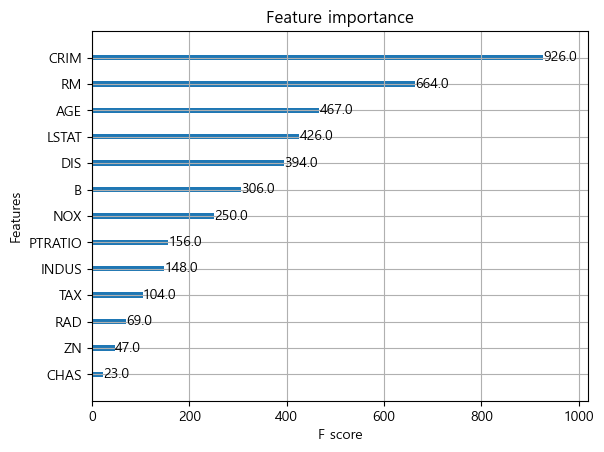

In [42]:
from xgboost import plot_importance
grid_xgb = XGBRegressor(learning_rate=0.1, max_depth=7, min_child_weight=1)
grid_xgb.fit(X_train, y_train)
plot_importance(grid_xgb)
# plot_importance(grid.best_estimator_[1])

[해석]
- XGBoost 모델로 나타난 변수 중요도를 시각화한 결과, CRIM 변수가 최종 성적에 영향을 많이 주는 것으로 보임.
- 반면에 ZN과 CHAS, RAD는 모델에 큰 영향을 주지 못하는 것으로 나타남.

### 3. RandomForest

In [33]:
# 컬럼 속성별 전처리 transformer 만들기
numeric_features = train.columns.drop(['CHAS', 'MEDV'])
categorical_features = ['CHAS']

column_transformer = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)
])

rfr = Pipeline([("preprocesser", column_transformer),
                  ('rfr', RandomForestRegressor(random_state=1))])

In [34]:
# gridsearch 진행

## 데이터 전처리와 모델 학습하는 파이프라인 만들기
param_grid = {"rfr__max_depth": [8, 16, 24],
            "rfr__min_samples_leaf": [1, 6, 12],
             "rfr__min_samples_split": [2, 8, 18]}

## 그리드 서치 진행
start_time = time.time()
grid = GridSearchCV(estimator=rfr, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
end_time = time.time()

print(f'소요 시간: {end_time - start_time} sec')

scores_df = pd.DataFrame(grid.cv_results_) # 그리드 서치 결과를 데이터프레임으로 변환
display(scores_df.sort_values(by='mean_test_score', ascending=False).head(5))
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ', grid.best_params_)

## 그리드 서치의 refit으로 이미 학습된 estimator 반환
rfr_estimator = grid.best_estimator_

### 그리드 서치의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음.
pred = rfr_estimator.predict(X_test)
print('테스트 데이터 RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

소요 시간: 40.928938150405884 sec


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfr__max_depth,param_rfr__min_samples_leaf,param_rfr__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.371884,0.079993,0.016788,0.003162,24,1,2,"{'rfr__max_depth': 24, 'rfr__min_samples_leaf'...",-14.170090,-14.751849,-9.242125,-9.293349,-13.695365,-12.230556,2.442223,1
9,0.330783,0.055396,0.015967,0.000632,16,1,2,"{'rfr__max_depth': 16, 'rfr__min_samples_leaf'...",-14.241861,-14.787477,-9.196206,-9.146217,-13.842239,-12.242800,2.525882,2
0,0.295648,0.011614,0.017968,0.003737,8,1,2,"{'rfr__max_depth': 8, 'rfr__min_samples_leaf':...",-14.412717,-14.978426,-9.272161,-9.211426,-14.221137,-12.419173,2.606315,3
10,0.268461,0.005668,0.014587,0.000478,16,1,8,"{'rfr__max_depth': 16, 'rfr__min_samples_leaf'...",-13.594641,-15.652374,-9.333519,-9.180826,-14.468040,-12.445880,2.684688,4
19,0.351080,0.048105,0.018067,0.003927,24,1,8,"{'rfr__max_depth': 24, 'rfr__min_samples_leaf'...",-13.597325,-15.651973,-9.330378,-9.180706,-14.470809,-12.446238,2.685997,5


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'rfr__max_depth': 24, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2}
테스트 데이터 RMSE: 3.024530060619541


[해석]
- 모델 학습 시간은약 40초임.
    - 하이퍼 파라미터 튜닝에 따라 늘어날수도 줄어들수도 있음.
- 테스트 데이터의 성능을 확인한 결과, RMSE 값이 약 3.0245으로 나옴.

[해석]
- 학습 소요 시간과 RMSE 값이 모두 작은 XGBoost 모델을 사용하기로 결정함.

### 6. 예측값 도출

In [40]:
# loading test data
test = pd.read_csv('C:/Users/user/Desktop/Python/adp/2. dacon/data/house_price/test.csv').drop('ID', axis=1)
display(train.head(3))
print(test.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


(51, 13)


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     51 non-null     float64
 1   ZN       51 non-null     float64
 2   INDUS    51 non-null     float64
 3   CHAS     51 non-null     float64
 4   NOX      51 non-null     float64
 5   RM       51 non-null     float64
 6   AGE      51 non-null     float64
 7   DIS      51 non-null     float64
 8   RAD      51 non-null     float64
 9   TAX      51 non-null     float64
 10  PTRATIO  51 non-null     float64
 11  B        51 non-null     float64
 12  LSTAT    51 non-null     float64
dtypes: float64(13)
memory usage: 5.3 KB


In [24]:
test.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [27]:
# 중복 개수 확인
print('중복 행 개수: {} 개'.format(test.duplicated().sum()))

중복 행 개수: 0 개


In [56]:
# 예측값 생성
pred = xgb_estimator.predict(test)

In [58]:
# submission file 불러오기
submission = pd.read_csv('C:/Users/user/Desktop/Python/adp/2. dacon/data/house_price/sample_submission.csv')
submission.head()

,ID,MEDV
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [64]:
# 결과물 저장
submission['MEDV'] = pred
submission.to_csv('C:/Users/user/Desktop/Python/adp/2. dacon/data/house_price/result1.csv', index=False)